# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/grape/train",
    label_mode="categorical",
    class_names=['Grape Esca (Black_Measles)','Grape Leaf blight (Isariopsis_Leaf_Spot)','grape leaf Healthy','grape leaf black rot'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/grape/valid",
    label_mode="categorical",
    class_names=['Grape Esca (Black_Measles)','Grape Leaf blight (Isariopsis_Leaf_Spot)','grape leaf Healthy','grape leaf black rot'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 7335 files belonging to 4 classes.
==========================Validation Data====================
Found 1825 files belonging to 4 classes.


In [3]:
# All images will be rescaled by 1./255.and augmented
train_datagen = ImageDataGenerator(rescale = 1.0/256.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/grape/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/grape/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 7335 images belonging to 4 classes.
Found 1825 images belonging to 4 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Grape Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Grape/Non Augmented/Saved Model/Grape_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 11s 58ms/step - loss: 0.0049 - accuracy: 0.9989
Accuracy: 99.890411%
Loss: 0.490846%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 43ms/step


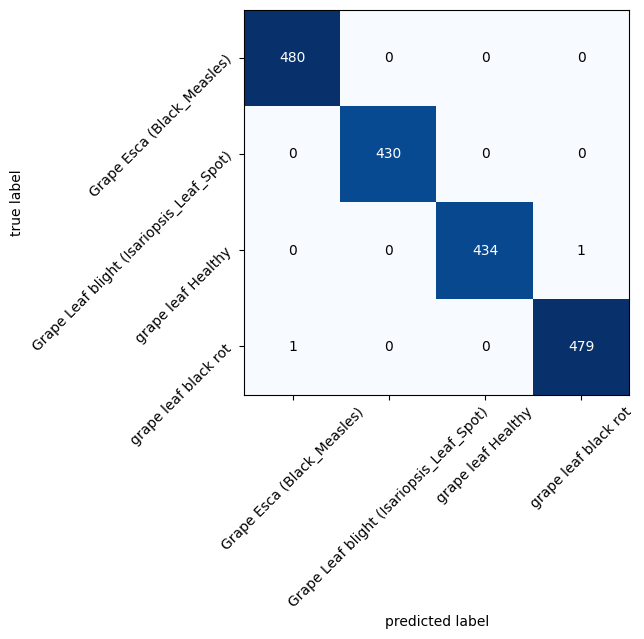

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.9989313339885373


In [6]:
# Confusion Matrix and Classification Report
target_names = ['Grape Esca (Black_Measles)','Grape Leaf blight (Isariopsis_Leaf_Spot)','grape leaf Healthy','grape leaf black rot']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_dense_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_dense_non_aug1)

## Model Dense121 Version 2 Grape Non Augmented

In [7]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Grape/Non Augmented/Saved Model/Grape_DenseNet_model2_Based_Non_Augmented')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 6s 47ms/step - loss: 0.0012 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.124938%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 43ms/step


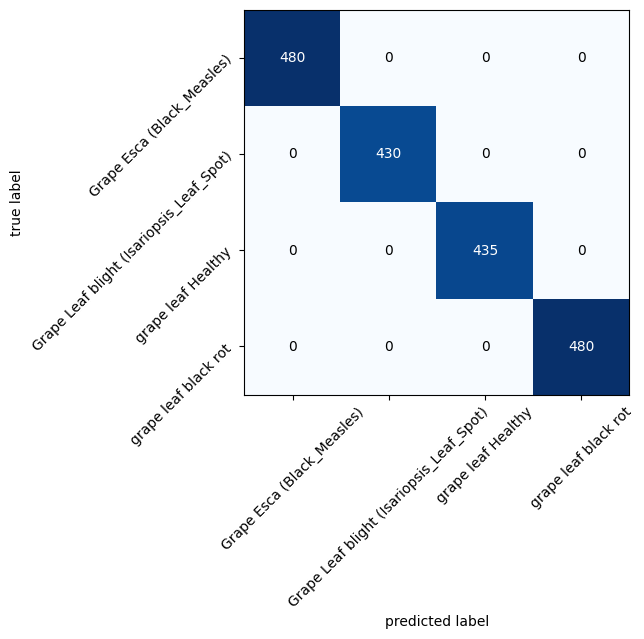

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  1.0


In [9]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_dense_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_dense_non_aug2)

## MobileNet V2 Version 1 Grape Non Augmented

In [10]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Grape/Non Augmented/Saved Model/Grape_MobileNetV2_model1_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 4s 27ms/step - loss: 0.0017 - accuracy: 0.9995
Accuracy: 99.945205%
Loss: 0.174052%


==========================Confusion Matrix====================
92/92 [==============================] - 3s 23ms/step


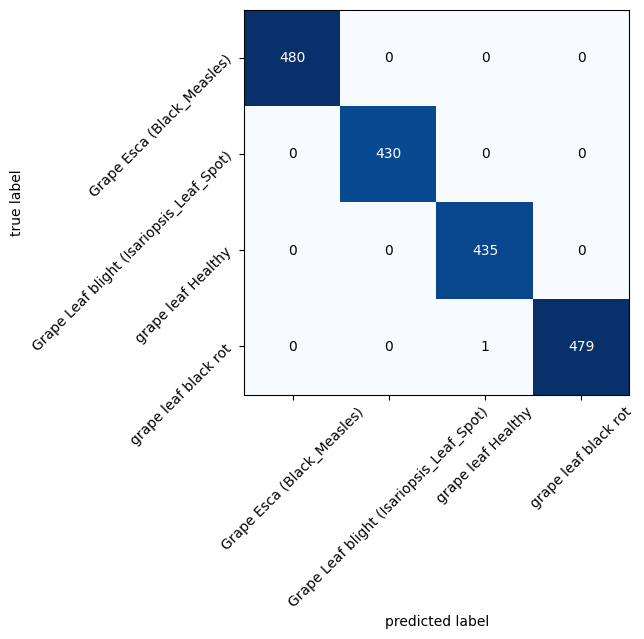

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.999452285376678


In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_mobile_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_mobile_non_aug1)

## MobileNet V2 Version 2 Grape Non Augmented

In [13]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Grape/Non Augmented/Saved Model/Grape_MobileNetV2_model2_Based_Non_Augmented')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 3s 25ms/step - loss: 0.0051 - accuracy: 0.9989
Accuracy: 99.890411%
Loss: 0.507118%


==========================Confusion Matrix====================
92/92 [==============================] - 3s 24ms/step


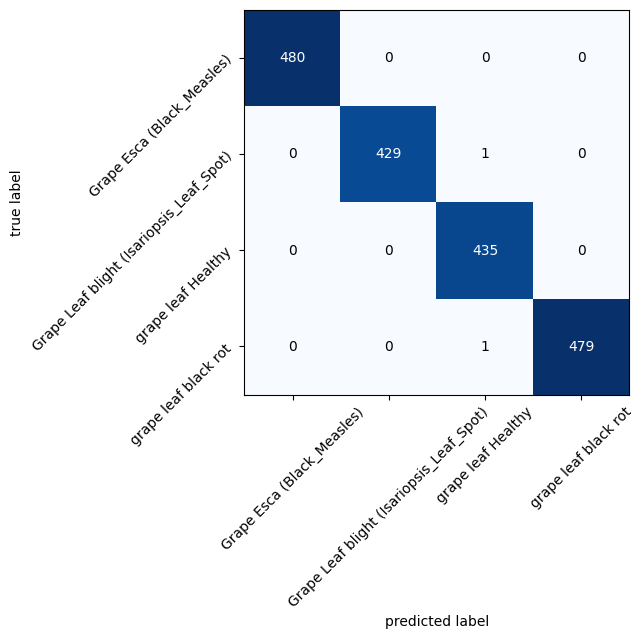

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.9988748811992195


In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_mobile_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_mobile_non_aug2)

## DIY Version 1 Grape Non Augmented

In [16]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Grape/Non Augmented/Saved Model/Grape_DIY_model1_Based_Non_Augmented')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 2s 23ms/step - loss: 0.0894 - accuracy: 0.9858
Accuracy: 98.575342%
Loss: 8.943274%


==========================Confusion Matrix====================
92/92 [==============================] - 2s 22ms/step


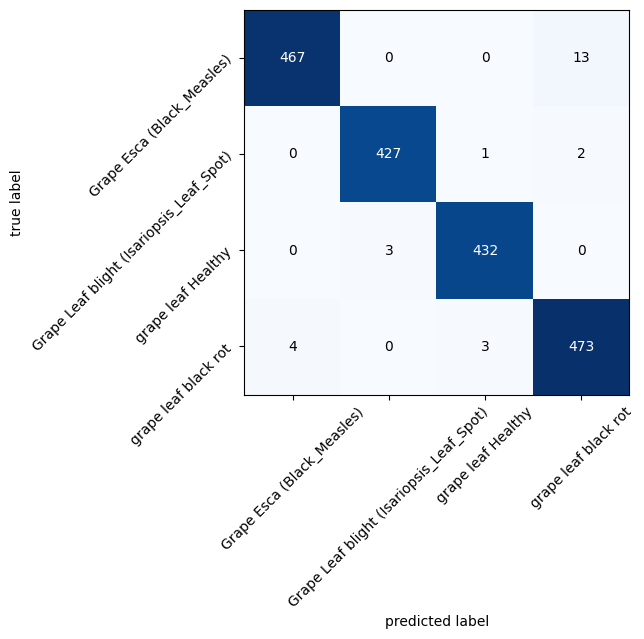

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       0.99      0.97      0.98       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       0.99      0.99      0.99       430
                      grape leaf Healthy       0.99      0.99      0.99       435
                    grape leaf black rot       0.97      0.99      0.98       480

                                accuracy                           0.99      1825
                               macro avg       0.99      0.99      0.99      1825
                            weighted avg       0.99      0.99      0.99      1825

==========================F1 Score====================
F1 Score :  0.986095830905634


In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_diy_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_diy_non_aug1)

## DIY Version 2 Grape Non Augmented

In [19]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Grape/Non Augmented/Saved Model/Grape_DIY_model2_Based_Non_Augmented')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 2s 23ms/step - loss: 0.1324 - accuracy: 0.9819
Accuracy: 98.191780%
Loss: 13.240896%


==========================Confusion Matrix====================
92/92 [==============================] - 2s 23ms/step


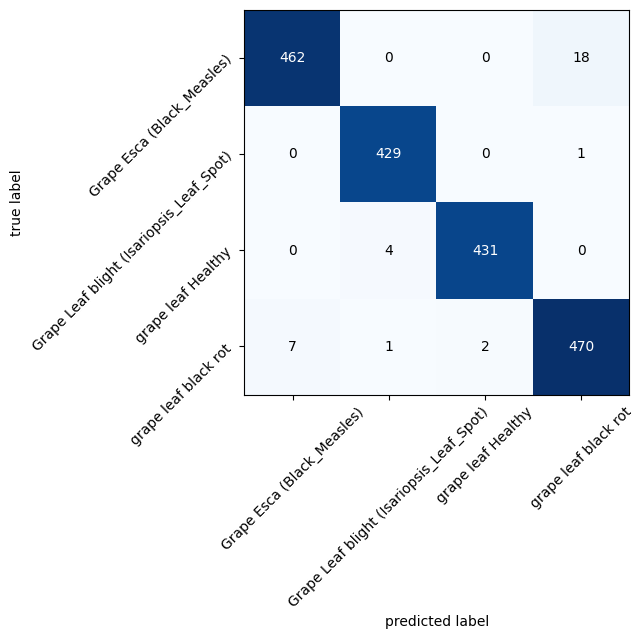

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       0.99      0.96      0.97       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       0.99      1.00      0.99       430
                      grape leaf Healthy       1.00      0.99      0.99       435
                    grape leaf black rot       0.96      0.98      0.97       480

                                accuracy                           0.98      1825
                               macro avg       0.98      0.98      0.98      1825
                            weighted avg       0.98      0.98      0.98      1825

==========================F1 Score====================
F1 Score :  0.9824679582717806


In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_diy_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_diy_non_aug2)

## Xception Version 1 Grape Non Augmented

In [22]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Grape/Non Augmented/Saved Model/Grape_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 7s 58ms/step - loss: 0.0030 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.296401%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 53ms/step


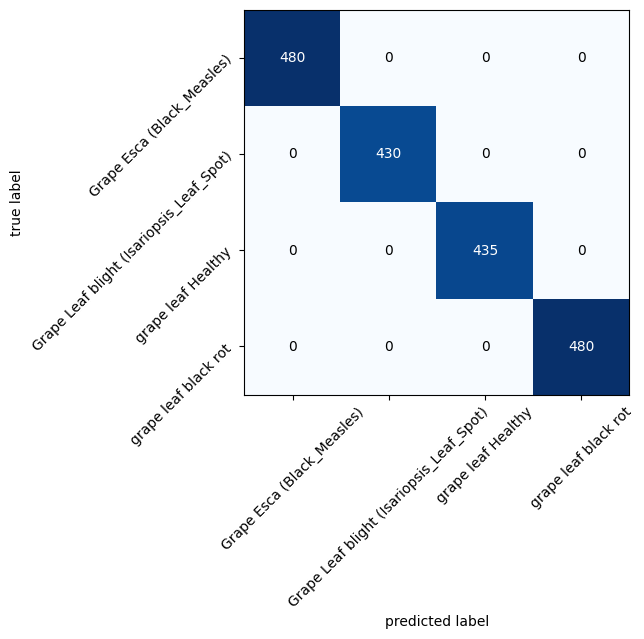

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  1.0


In [24]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_xception_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_xception_non_aug1)

## Xception Version 2 Grape Non Augmented

In [25]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Grape/Non Augmented/Saved Model/Grape_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 6s 56ms/step - loss: 0.0032 - accuracy: 0.9984
Accuracy: 99.835616%
Loss: 0.316375%


==========================Confusion Matrix====================
92/92 [==============================] - 6s 53ms/step


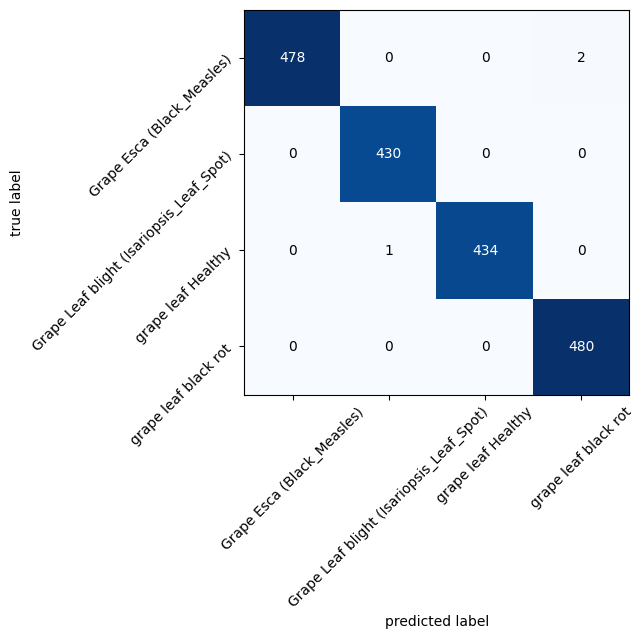

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.9983802817691857


In [27]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_xception_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_xception_non_aug2)

# Model Augmented Evaluating

## Model Dense121 Version 1 Grape Augmented

In [28]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Grape/Augmented/Saved Model/Grape_DenseNet_model1_Based_Augmented')

In [29]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 6s 49ms/step - loss: 0.0039 - accuracy: 0.9989
Accuracy: 99.890411%
Loss: 0.385181%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 44ms/step


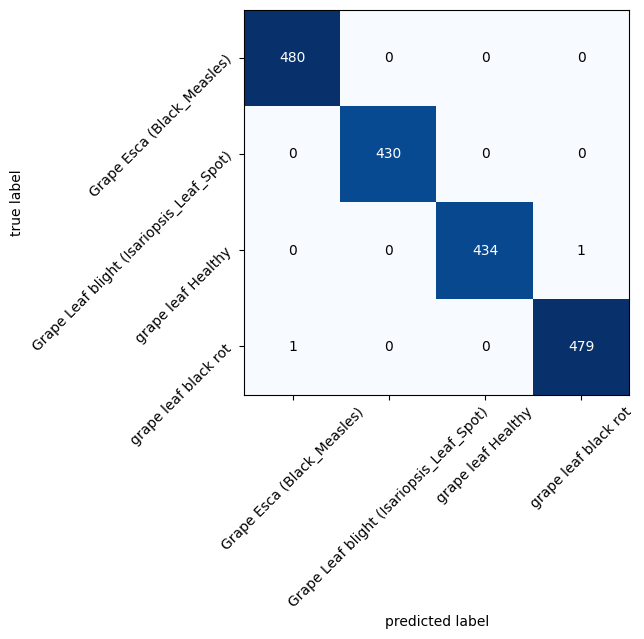

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.9989313339885373


In [30]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_dense_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_dense_aug1)

## Model Dense121 Version 2 Grape Augmented

In [31]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Grape/Augmented/Saved Model/Grape_DenseNet_model2_Based_Augmented')

In [32]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 6s 48ms/step - loss: 0.0028 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.279141%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 43ms/step


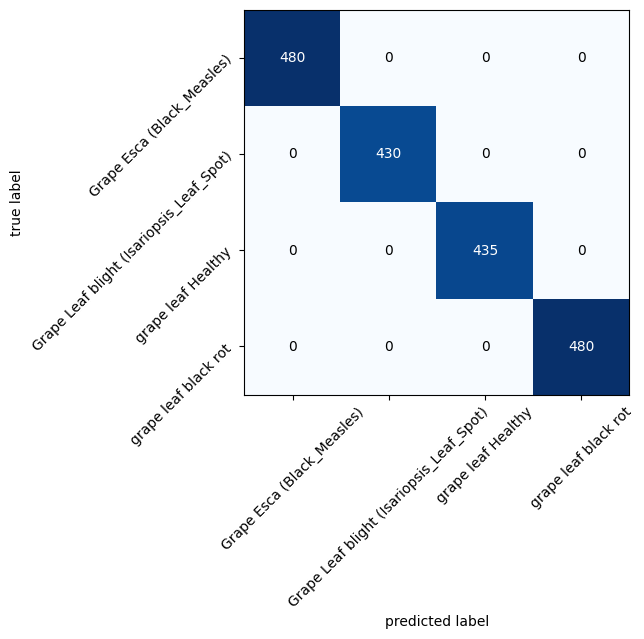

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  1.0


In [33]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_dense_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_dense_aug2)

## MobileNet V2 Version 1 Grape Non Augmented

In [34]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Grape/Augmented/Saved Model/Grape_MobileNetV2_model1_Based_Augmented')

In [35]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 3s 25ms/step - loss: 5.0156e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.050156%


==========================Confusion Matrix====================
92/92 [==============================] - 3s 24ms/step


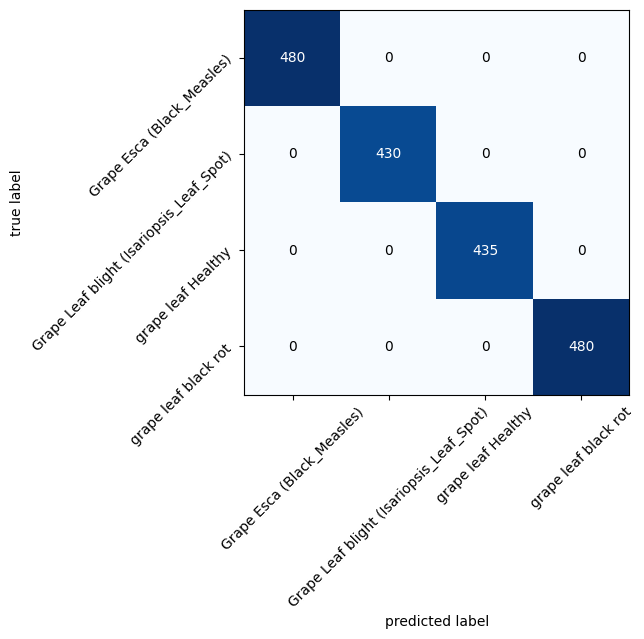

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  1.0


In [36]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_mobile_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_mobile_aug1)

## MobileNet V2 Version 2 Grape Non Augmented

In [37]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Grape/Augmented/Saved Model/Grape_MobileNetV2_model2_Based_Augmented')

In [38]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 3s 25ms/step - loss: 0.0045 - accuracy: 0.9995
Accuracy: 99.945205%
Loss: 0.449246%


==========================Confusion Matrix====================
92/92 [==============================] - 3s 23ms/step


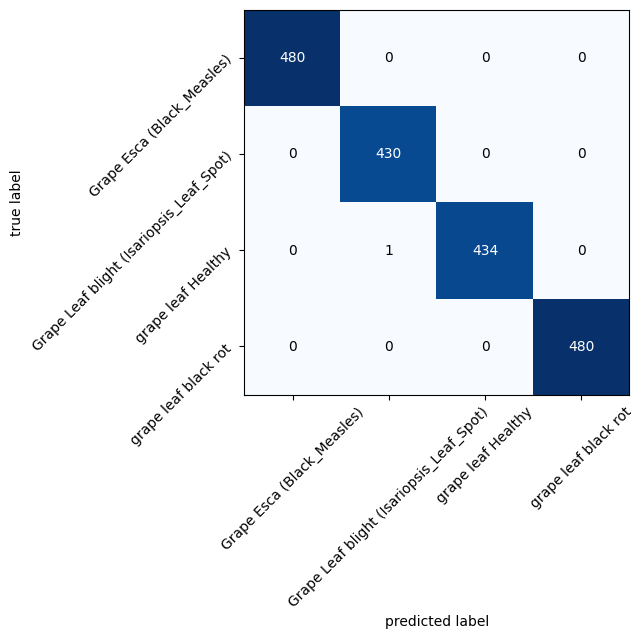

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.9994219529569947


In [39]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_mobile_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_mobile_aug2)

## Xception Version 1 Grape Augmented

In [40]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Grape/Augmented/Saved Model/Grape_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 6s 55ms/step - loss: 0.0024 - accuracy: 0.9995
Accuracy: 99.945205%
Loss: 0.236826%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 53ms/step


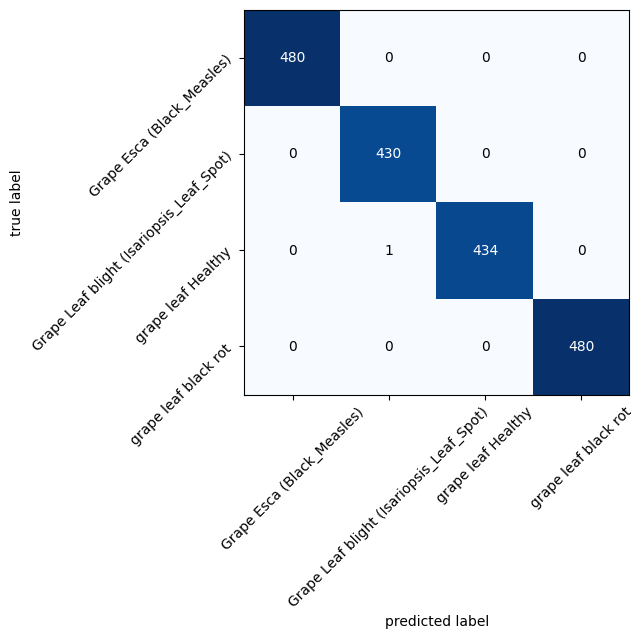

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  0.9994219529569947


In [42]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_Xception_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_Xception_aug1)

## Xception Version 2 Grape Augmented

In [43]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Grape/Augmented/Saved Model/Grape_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 6s 56ms/step - loss: 9.9676e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.099676%


==========================Confusion Matrix====================
92/92 [==============================] - 5s 53ms/step


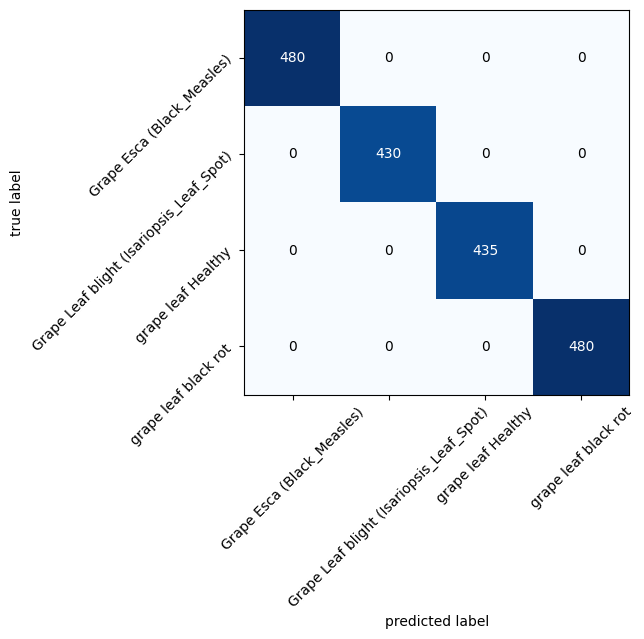

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       1.00      1.00      1.00       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                      grape leaf Healthy       1.00      1.00      1.00       435
                    grape leaf black rot       1.00      1.00      1.00       480

                                accuracy                           1.00      1825
                               macro avg       1.00      1.00      1.00      1825
                            weighted avg       1.00      1.00      1.00      1825

==========================F1 Score====================
F1 Score :  1.0


In [45]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_Xception_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_Xception_aug2)

## DIY Version 1 Grape Augmented

In [46]:
# Load model
DIY_Aug1 = tf.keras.models.load_model('Modelling/Grape/Augmented/Saved Model/Grape_DIY_model1_Based_Augmented')

In [47]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug1 = DIY_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug1[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 2s 23ms/step - loss: 0.0486 - accuracy: 0.9830
Accuracy: 98.301369%
Loss: 4.858579%


==========================Confusion Matrix====================
92/92 [==============================] - 2s 21ms/step


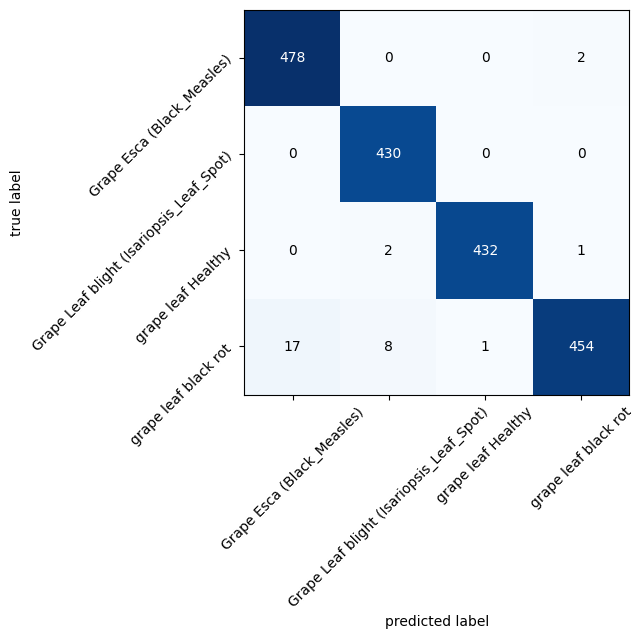

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       0.97      1.00      0.98       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       0.98      1.00      0.99       430
                      grape leaf Healthy       1.00      0.99      1.00       435
                    grape leaf black rot       0.99      0.95      0.97       480

                                accuracy                           0.98      1825
                               macro avg       0.98      0.98      0.98      1825
                            weighted avg       0.98      0.98      0.98      1825

==========================F1 Score====================
F1 Score :  0.98336510819844


In [48]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_DIY_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_DIY_aug1)

## DIY Version 2 Grape Augmented

In [49]:
# Load model
DIY_Aug2 = tf.keras.models.load_model('Modelling/Grape/Augmented/Saved Model/Grape_DIY_model2_Based_Augmented')

In [50]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug2 = DIY_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug2[0]*100))

==========================Evaluate Model====================
92/92 [==============================] - 2s 23ms/step - loss: 0.0502 - accuracy: 0.9874
Accuracy: 98.739725%
Loss: 5.021571%


==========================Confusion Matrix====================
92/92 [==============================] - 2s 22ms/step


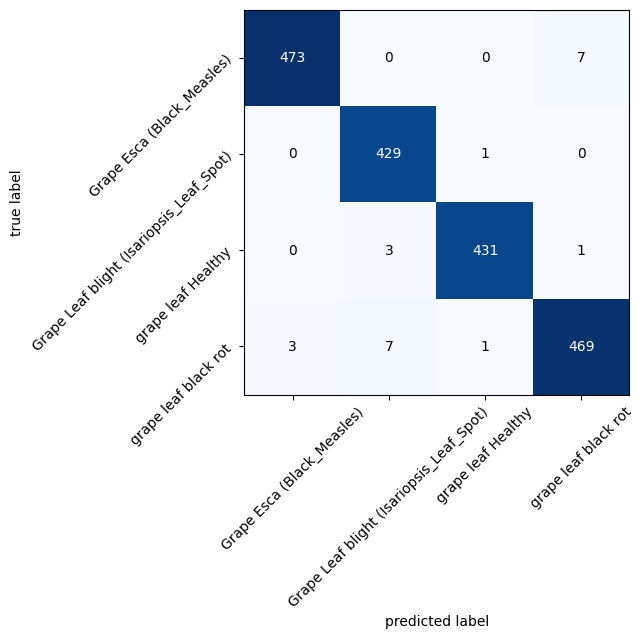

==========================Classification Report====================
Classification Report
                                          precision    recall  f1-score   support

              Grape Esca (Black_Measles)       0.99      0.99      0.99       480
Grape Leaf blight (Isariopsis_Leaf_Spot)       0.98      1.00      0.99       430
                      grape leaf Healthy       1.00      0.99      0.99       435
                    grape leaf black rot       0.98      0.98      0.98       480

                                accuracy                           0.99      1825
                               macro avg       0.99      0.99      0.99      1825
                            weighted avg       0.99      0.99      0.99      1825

==========================F1 Score====================
F1 Score :  0.9875288423001696


In [51]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Grape_DIY_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Grape_DIY_aug2)

# Compare All

In [52]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2,
    "DIY_Aug1": DIY_Aug1,
    "DIY_Aug2": DIY_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[1],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1],
    "DIY_Aug1": scores_DIY_Aug1[1],
    "DIY_Aug2": scores_DIY_Aug2[1]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0],
    "DIY_Aug1": scores_DIY_Aug1[0],
    "DIY_Aug2": scores_DIY_Aug2[0]
}

# f1
f1 = {
    "Dense_Non_Aug1": f1_Grape_dense_non_aug1,
    "Dense_Non_Aug2": f1_Grape_dense_non_aug2,
    "Mobile_Non_Aug1": f1_Grape_mobile_non_aug1,
    "Mobile_Non_Aug2": f1_Grape_mobile_non_aug2,
    "DIY_Non_Aug1": f1_Grape_diy_non_aug1,
    "DIY_Non_Aug2": f1_Grape_diy_non_aug2,
    "Xception_Non_Aug1": f1_Grape_xception_non_aug1,
    "Xception_Non_Aug2": f1_Grape_xception_non_aug2,
    "Dense_Aug1": f1_Grape_dense_aug1,
    "Dense_Aug2": f1_Grape_dense_aug2,
    "Mobile_Aug1": f1_Grape_mobile_aug1,
    "Mobile_Aug2": f1_Grape_mobile_aug2,
    "Xception_Aug1": f1_Grape_Xception_aug1,
    "Xception_Aug2": f1_Grape_Xception_aug2,
    "DIY_Aug1": f1_Grape_DIY_aug1,
    "DIY_Aug2": f1_Grape_DIY_aug2
}

# Make dataframe of all models, accuracy, loss, and f1 score
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model  Accuracy      Loss        F1
1      Dense_Non_Aug2  1.000000  0.001249  1.000000
6   Xception_Non_Aug1  1.000000  0.002964  1.000000
9          Dense_Aug2  1.000000  0.002791  1.000000
10        Mobile_Aug1  1.000000  0.000502  1.000000
13      Xception_Aug2  1.000000  0.000997  1.000000
2     Mobile_Non_Aug1  0.999452  0.001741  0.999452
11        Mobile_Aug2  0.999452  0.004492  0.999422
12      Xception_Aug1  0.999452  0.002368  0.999422
0      Dense_Non_Aug1  0.998904  0.004908  0.998931
3     Mobile_Non_Aug2  0.998904  0.005071  0.998875
8          Dense_Aug1  0.998904  0.003852  0.998931
7   Xception_Non_Aug2  0.998356  0.003164  0.998380
15           DIY_Aug2  0.987397  0.050216  0.987529
4        DIY_Non_Aug1  0.985753  0.089433  0.986096
14           DIY_Aug1  0.983014  0.048586  0.983365
5        DIY_Non_Aug2  0.981918  0.132409  0.982468


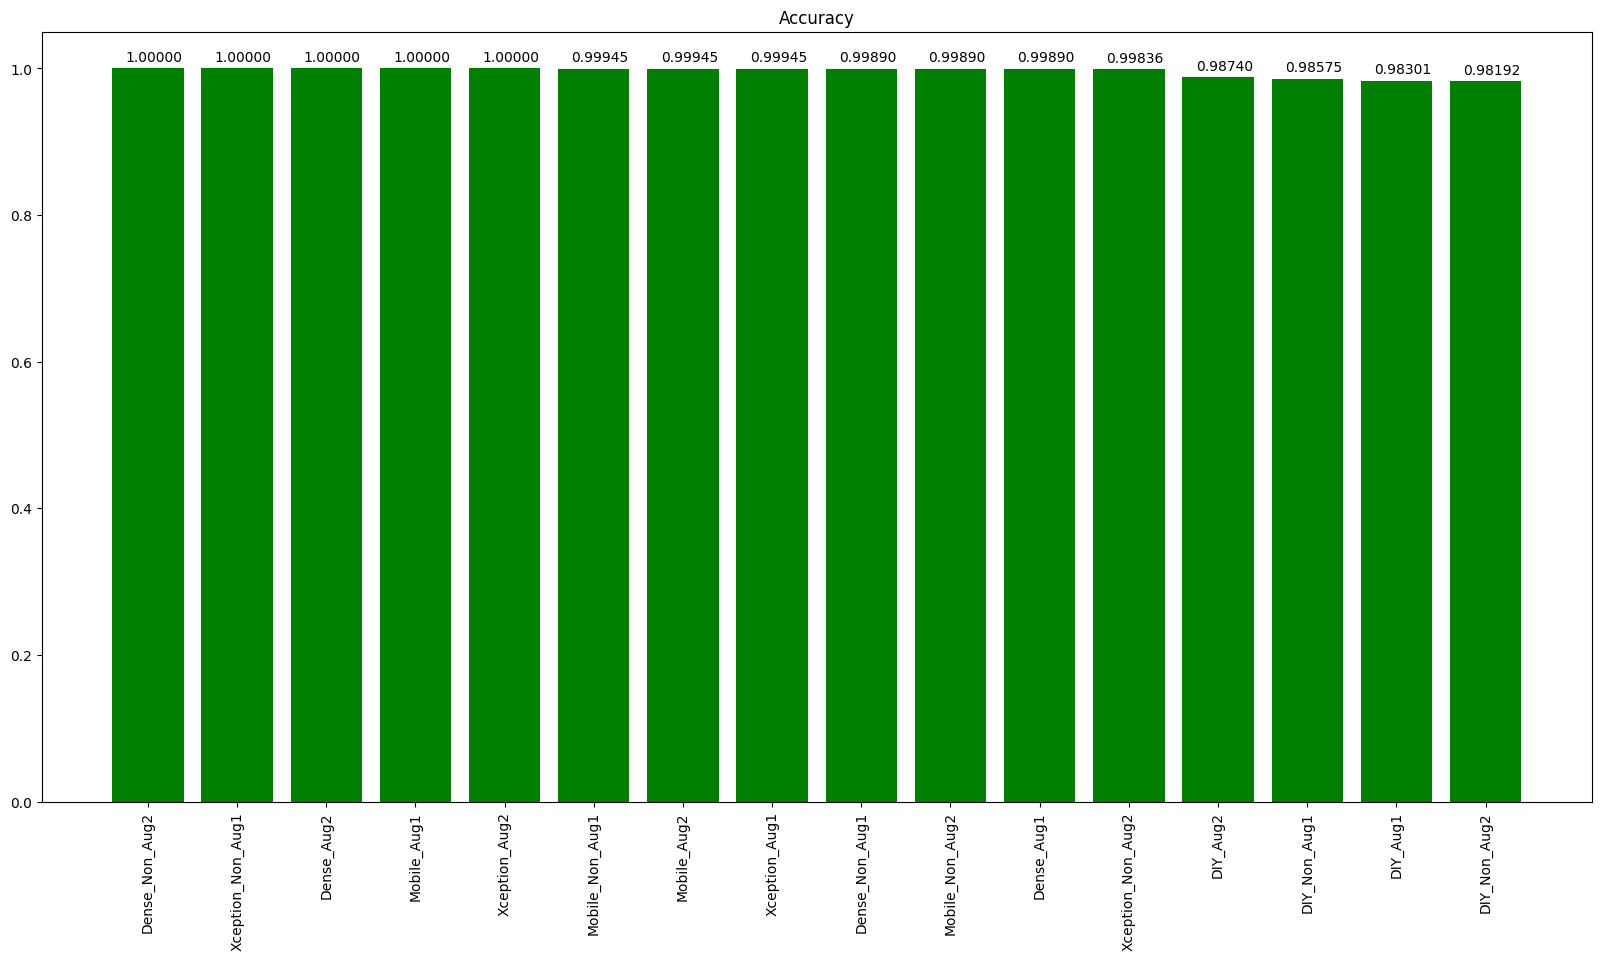

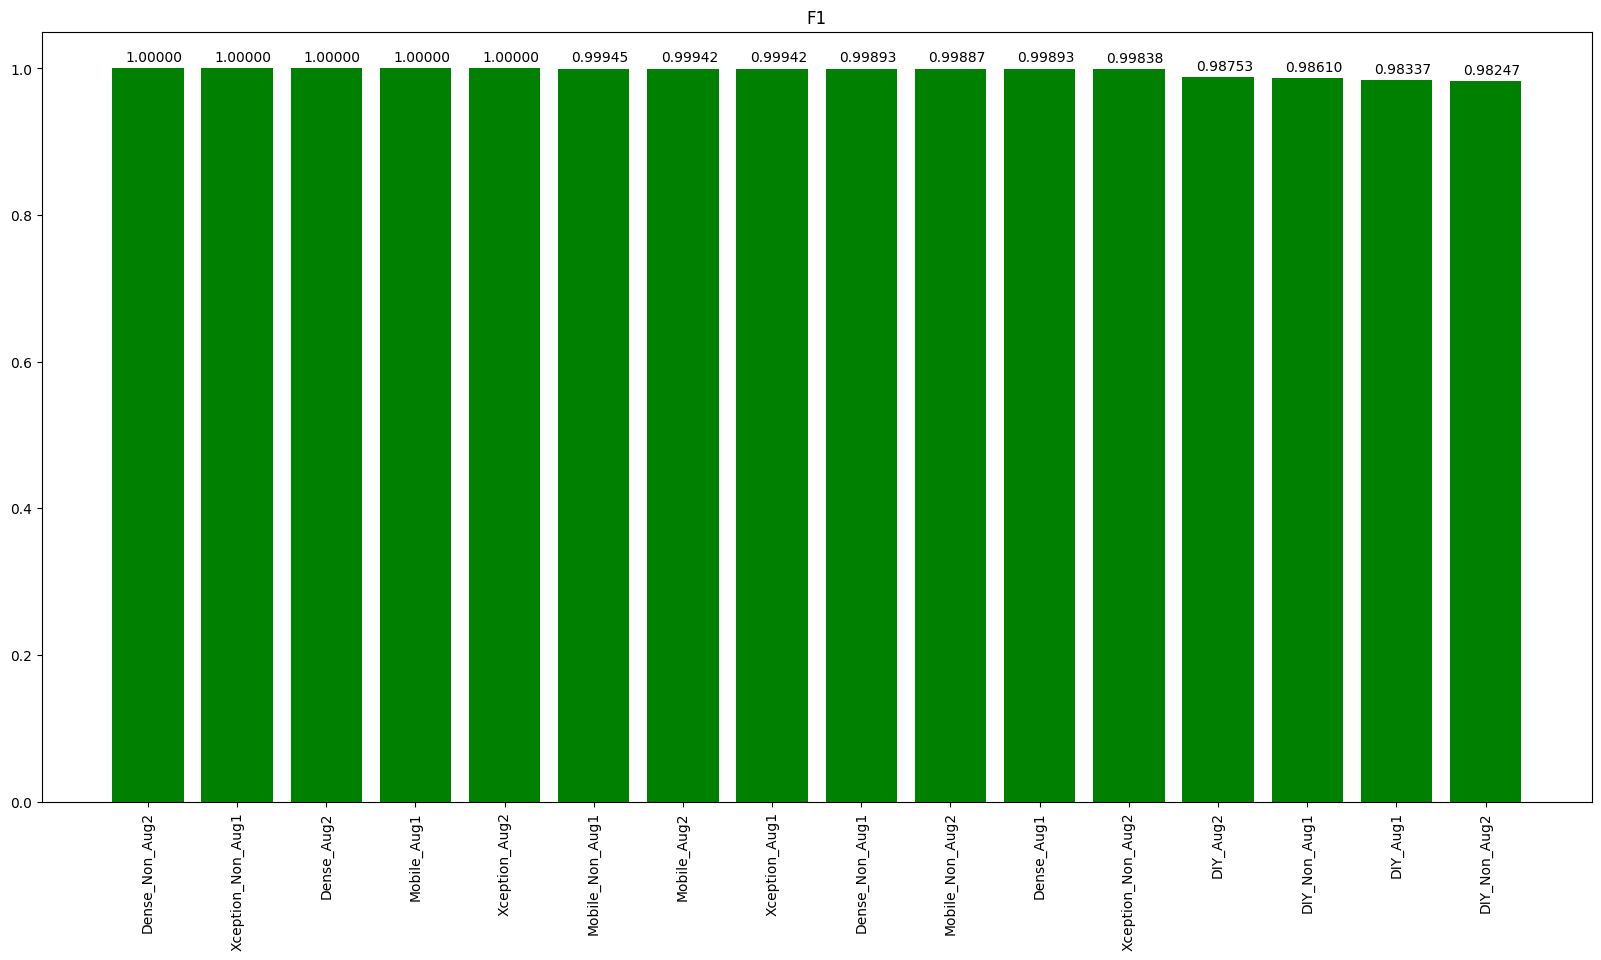

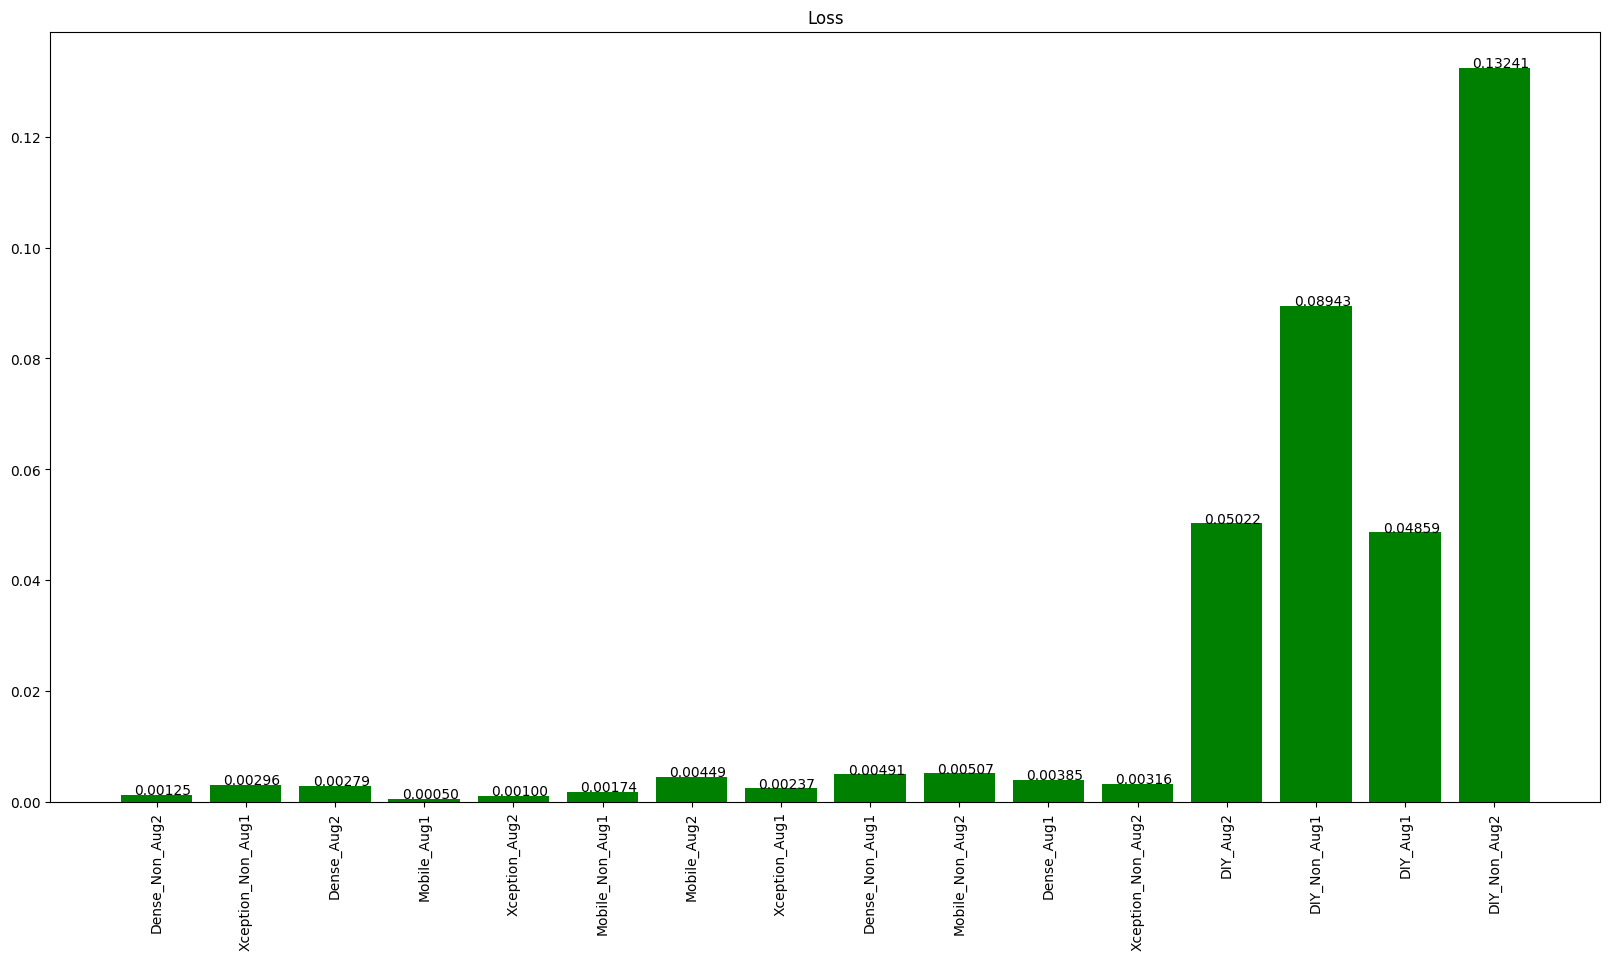

In [53]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(20, 10))
plt.title('Accuracy')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# F1
plt.figure(figsize=(20, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# Loss
plt.figure(figsize=(20, 10))
plt.title('Loss')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0001, '{0:.5f}'.format(v))
plt.show()